
Problem Statement  
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home.  
Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it.  
 Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money.   
 Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses  

 Minimum Requirements  
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

Load The Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

chnsal = pd.read_csv("chn-sale.csv")
chnsal.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
chnsal.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.52,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.16,425350,119098,8507000
7108,P09794,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,...,ELO,Paved,I,3.1,3.5,4.3,3.64,349177,79812,9976480


Data Preprocessing

In [ ]:
chnsal.shape


(7109, 22)

In [ ]:
#chnsal.describe(include='all').T
#chnsal.dtypes.value_counts()
chnsal.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [2]:
#Convert N_BEDROOM,N_BATHROOM to int and DATE_SALE,DATE_BUILD to datetime
chnsal['DATE_SALE']=pd.to_datetime(chnsal['DATE_SALE'])
chnsal['DATE_BUILD']=pd.to_datetime(chnsal['DATE_BUILD'])


In [3]:
#Find null values
#pd.DataFrame(chnsal.isnull().sum()).T
#chnsal.isna().sum()
chnsal.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [4]:
 #Since N_BEDROOM,N_BATHROOM is discrete impute nan with mode
 #chnsal.N_BEDROOM.describe()
chnsal['N_BEDROOM'].fillna(chnsal['N_BEDROOM'].mode()[0],inplace=True)
chnsal['N_BATHROOM'].fillna(chnsal['N_BATHROOM'].mode()[0],inplace=True)
 # explicilty type casting
chnsal.N_BEDROOM = chnsal.N_BEDROOM.astype('int64')
chnsal.N_BATHROOM = chnsal.N_BATHROOM.astype('int64')


In [5]:
chnsal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [6]:
# Find Duplicates 
chnsal[chnsal.duplicated()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


Drop PRT_ID since it is not required.  
Drop commision,regfee since this is not known before sales  
Drop Date_sale,Date_build after creating a new field HouseAge.  
Drop QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL as these are masked values.


In [7]:
chnsal.drop(['PRT_ID','REG_FEE','COMMIS','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1, inplace=True)
chnsal

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,1962-01-15,Others,ELO,No Access,RM,5353000
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,1995-11-04,Others,NoSeWa,No Access,RH,10818480
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,1978-01-09,House,NoSeWa,Gravel,I,8351410
7107,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,8507000


In [8]:
#Find House Age from sale date and build date and drop DATE_SALE,DATE_BUILD
chnsal["House_AGE"]=((chnsal['DATE_SALE'].dt.year) -(chnsal['DATE_BUILD'].dt.year))

In [9]:
chnsal.drop(['DATE_SALE','DATE_BUILD'],axis=1, inplace=True)
#Changing the postion of the Date_Sale
col = chnsal.pop('House_AGE')
chnsal.insert(3, 'House_AGE',col)
chnsal

,AREA,INT_SQFT,DIST_MAINROAD,House_AGE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,Karapakkam,1004,131,44,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000
1,Anna Nagar,1986,26,11,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770
2,Adyar,909,70,20,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200
3,Velachery,1855,14,22,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290
4,Karapakkam,1226,84,30,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,49,1,1,2,AdjLand,No,Others,ELO,No Access,RM,5353000
7105,Velachery,1897,52,9,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,10818480
7106,Velachery,1614,152,28,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,8351410
7107,Karapakkam,787,40,32,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,8507000


In [10]:
#chnsal.AREA.unique()
chnsal.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [11]:
#Cleaning Categorical Data -spell correction
chnsal["AREA"].replace({"Karapakam": "Karapakkam", "Chormpet": "Chrompet","Chrompt": "Chrompet","Chrmpet":"Chrompet","Adyr":"Adyar",
                     "TNagar": "T Nagar","Velchery":"Velachery","Ann Nagar":"Anna Nagar","Ana Nagar":"Anna Nagar","KK Nagar":"KKNagar"}, inplace=True)
chnsal["SALE_COND"].replace({"Ab Normal": "AbNormal","Adj Land": "AdjLand","Partiall": "Partial","PartiaLl":"Partial"},inplace=True)
chnsal["PARK_FACIL"].replace({"Noo": "No"},inplace=True)
chnsal["BUILDTYPE"].replace({"Other": "Others","Comercial":"Commercial"},inplace=True)
chnsal["UTILITY_AVAIL"].replace({"All Pub": "AllPub"},inplace=True)
chnsal["STREET"].replace({"No Access": "NoAccess","Pavd":"Paved"},inplace=True)
chnsal.AREA.unique(),chnsal.SALE_COND.unique(),chnsal.PARK_FACIL.unique(),chnsal.BUILDTYPE.unique(),chnsal.UTILITY_AVAIL.unique(),chnsal.STREET.unique(),chnsal.MZZONE.unique()


(array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
        'KKNagar', 'T Nagar'], dtype=object),
 array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
       dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Commercial', 'Others', 'House'], dtype=object),
 array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object),
 array(['Paved', 'Gravel', 'NoAccess'], dtype=object),
 array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object))

In [12]:
sum(chnsal.SALE_COND.value_counts()),sum(chnsal.BUILDTYPE.value_counts())
temp=["AREA","N_BEDROOM","N_BATHROOM","N_ROOM","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"]
for i in temp:
    print("******value counts in",i,"*******")
    print(chnsal[i].value_counts())
    print("")

******value counts in AREA *******
Chrompet      1702
Karapakkam    1366
KKNagar        997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

******value counts in N_BEDROOM *******
1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

******value counts in N_BATHROOM *******
1    5594
2    1515
Name: N_BATHROOM, dtype: int64

******value counts in N_ROOM *******
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

******value counts in SALE_COND *******
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

******value counts in PARK_FACIL *******
Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

******value counts in BUILDTYPE *******
House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

******value counts in UTILITY_AVAIL *******
AllPub     1887
NoSeWa     1871
NoSewr     1829

Exploratory Data Analysis(EDA)  
Univariate and Multivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

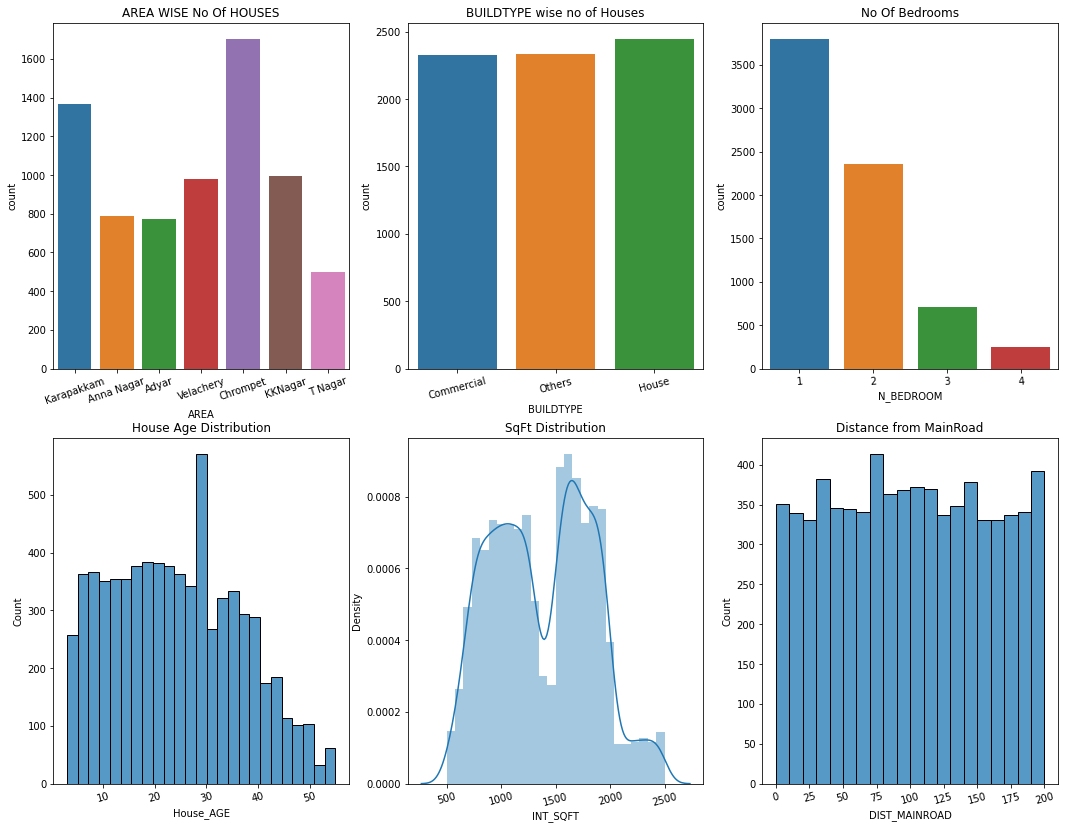

In [ ]:
#distributio plot for all features 
#plt.barh('AREA')
#plt.hist(chnsal.AREA,bins=20)
#px.histogram(df,x='AREA',color='AREA')
plt.figure(figsize=(18,14))
plt.subplot(231)
sns.countplot('AREA',data=chnsal)
#sns.countplot(chnsal['AREA'])
plt.xticks(rotation=19)
plt.title('AREA WISE No Of HOUSES')
plt.subplot(232)
sns.countplot(chnsal['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('BUILDTYPE wise no of Houses')
plt.subplot(233)
sns.countplot('N_BEDROOM',data=chnsal)
plt.xticks(rotation=5)
plt.title('No Of Bedrooms')
plt.subplot(234)
sns.histplot(x='House_AGE',data=chnsal)
plt.xticks(rotation=15)
plt.title('House Age Distribution')
plt.subplot(235)
sns.distplot(chnsal['INT_SQFT'])
plt.xticks(rotation=15)
plt.title('SqFt Distribution')
plt.subplot(236)
sns.histplot(x='DIST_MAINROAD',data=chnsal)
plt.xticks(rotation=15)
plt.title('Distance from MainRoad')

plt.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
subfig = make_subplots(rows=1, cols=3, subplot_titles=("Area wise distribution","Sale Condition Distribution",'MZZone Distribution'))

#fig.add_trace(go.Bar(x=chnsal['N_BEDROOM'], y=chnsal['N_BEDROOM'].value_counts(),name='No Of Bedrooms'), row=1, col=2)
#fig.update_layout(height=600, width=1000, title_text="Distribution Plot",showlegend=False)
a=chnsal['AREA'].value_counts()
subfig.add_bar(row=1, col=1,x=a.index,y=a.values)
b=chnsal['SALE_COND'].value_counts()
subfig.add_bar(row=1, col=2,x=b.index,y=b.values)
c=chnsal['MZZONE'].value_counts()
subfig.add_bar(row=1, col=3,x=c.index,y=c.values)

subfig.update_layout( title_text="Distribution Plots",showlegend=False)
subfig.show()

In [ ]:
fig = make_subplots(rows=1, cols=3,subplot_titles=('Street Distribution','Distribution of UTILITY Availability','Parking Facility Distribution'),
                    specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]])
d=chnsal['STREET'].value_counts()
d1=chnsal['STREET'].unique()
fig.add_trace(go.Pie(values=d,labels=d1,textinfo='label+percent',textposition='inside'),row=1, col=1)
e=chnsal['UTILITY_AVAIL'].value_counts()
e2=chnsal['UTILITY_AVAIL'].unique()
fig.add_trace(go.Pie(values=e,labels=e2,textinfo='label+percent'),row=1, col=2)
f=chnsal['PARK_FACIL'].value_counts()
f2=chnsal['PARK_FACIL'].unique()
fig.add_trace(go.Pie(values=f,labels=f2,textinfo='label+percent'),row=1, col=3)
fig.update_layout(showlegend=False)
fig.show()

In [13]:
chnsal.pivot_table(values="SALES_PRICE",index="AREA",aggfunc="median")

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KKNagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


In [ ]:
#stacked bar to check bedroom  distribution based
df2 = chnsal.groupby(['AREA','N_BEDROOM']).size().reset_index(name='')
fig = px.bar(df2,x="AREA",y="N_BEDROOM",color='N_BEDROOM',barmode='stack')
fig.show()

It can be seen from the distribution that area with high no of houses is Chrompet and less is TNagar  
House Type Build are more and No of Houses with 1BHK are more and 4bhk are less  
Sale condition with AdjLand is dominant.  

House features :INT_SQFT,N_BEDROOM,N_ROOM,N_BATHROOM,BUILDTYPE,SALE_COND,PARK_FACIL  
Locality features:AREA,MZZONE,UTILITY_AVAIL,STREET,DIST_MAINROAD



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


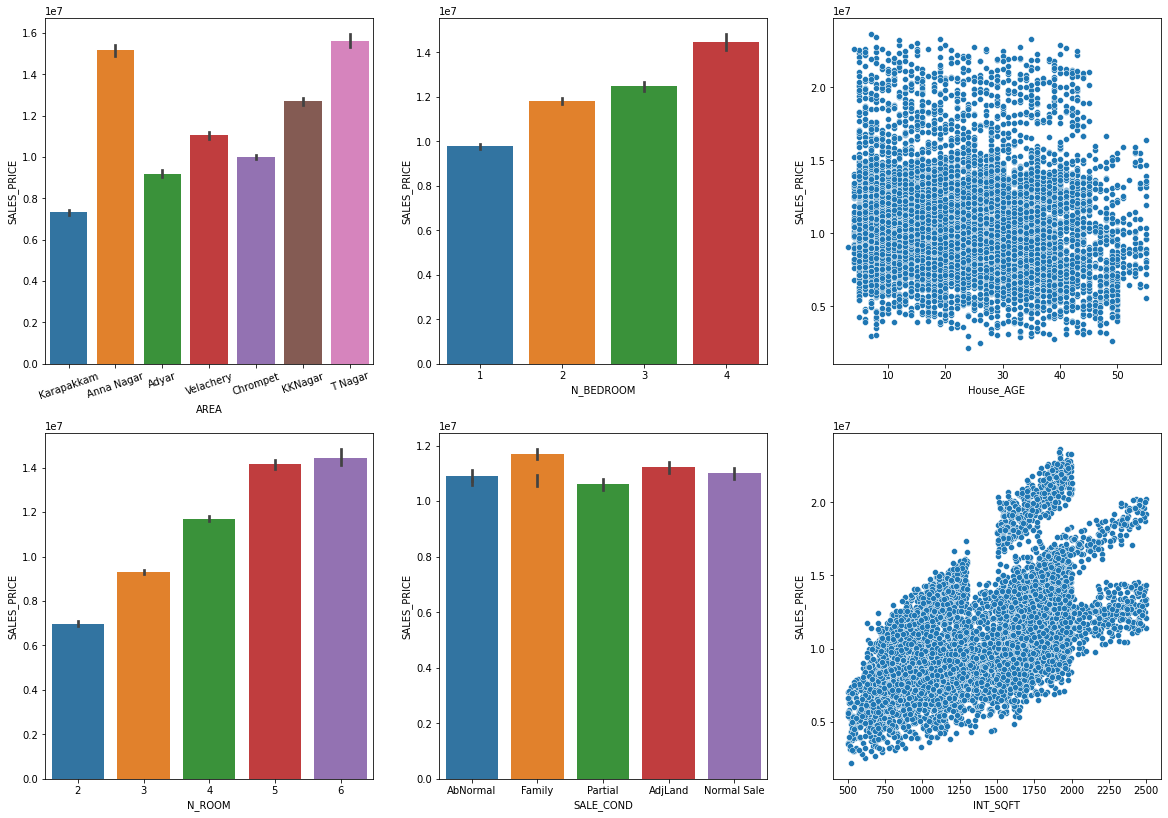

In [ ]:
#Feature vs Target  PLOT
plt.figure(figsize=(20,14))
plt.subplot(231)
sns.barplot(x=chnsal.AREA, y=chnsal.SALES_PRICE)
plt.xticks(rotation=19)
plt.subplot(232)
sns.barplot(x=chnsal.N_BEDROOM, y=chnsal.SALES_PRICE)
plt.subplot(233)
sns.scatterplot(x=chnsal.House_AGE, y=chnsal.SALES_PRICE)
plt.subplot(234)
sns.barplot(x=chnsal.N_ROOM, y=chnsal.SALES_PRICE)
plt.subplot(235)
sns.barplot(x=chnsal.N_BATHROOM, y=chnsal.SALES_PRICE)
plt.subplot(235)
sns.barplot(x=chnsal.SALE_COND, y=chnsal.SALES_PRICE)
plt.subplot(236)
sns.scatterplot(x=chnsal.INT_SQFT, y=chnsal.SALES_PRICE)
plt.show()
#plt.tight_layout()

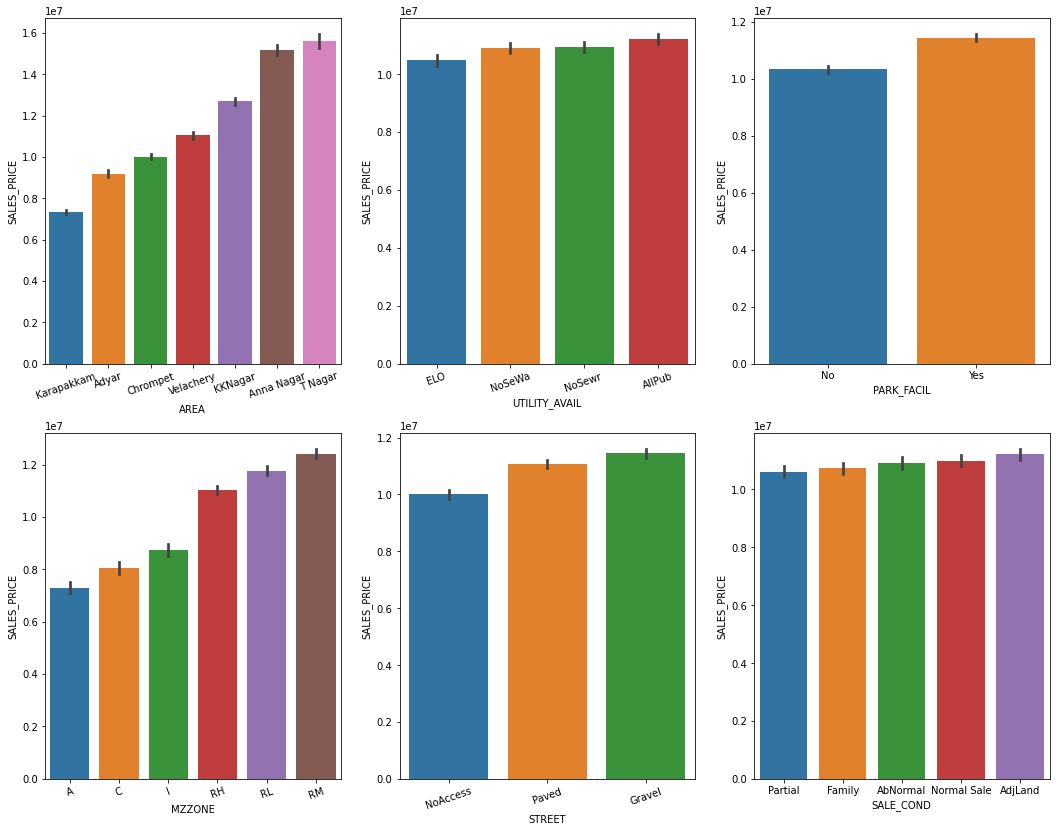

In [ ]:
plt.figure(figsize=(18,14))
plt.subplot(231)
sns.barplot(x=chnsal.AREA, y=chnsal.SALES_PRICE,order=chnsal.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=19)
plt.subplot(232)
sns.barplot(x=chnsal.UTILITY_AVAIL, y=chnsal.SALES_PRICE,order=chnsal.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=19)
plt.subplot(233)
sns.barplot(x=chnsal.PARK_FACIL, y=chnsal.SALES_PRICE,order=chnsal.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.subplot(234)
sns.barplot(x=chnsal.MZZONE, y=chnsal.SALES_PRICE,order=chnsal.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=19)
plt.subplot(235)
sns.barplot(x=chnsal.STREET, y=chnsal.SALES_PRICE,order=chnsal.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=19)
plt.subplot(236)
sns.barplot(x=chnsal.SALE_COND, y=chnsal.SALES_PRICE,order=chnsal.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.show()

It can be seen that Area,Sale condtion,N_Bedroom,N_Bathroom,N_Room have a linear relation with SalesPrice.  
Area,Sale condition should be labelencoded preserving order. N_BEDROOM,N_Room,N_Bathroom need not be encoded

It can be seen that INT_SQFT has a linear relation with Salesprice.
Since it is a numerical value no encoding,transformation required.

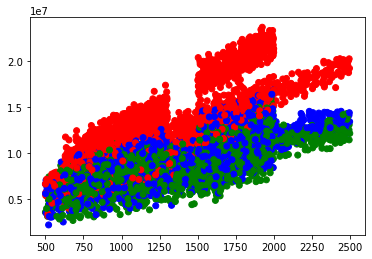

In [14]:
#chnsal.plot.scatter("INT_SQFT","SALES_PRICE")
fig,ax=plt.subplots()
colors={"Commercial":"red","House":"green","Others":"blue"}
#colors={"1":"red","2":"green","3":"blue"}
ax.scatter(chnsal["INT_SQFT"],chnsal["SALES_PRICE"],c=chnsal["BUILDTYPE"].apply(lambda x:colors[x]))
plt.show()


#data.pivot_table(values="SALES_PRICE",index="N_BEDROOM",columns="N_BATHROOM",aggfunc="median")

Text(0.5, 1.0, 'Dist Mainroad vs Price')

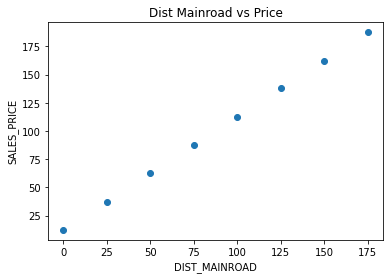

In [ ]:
a = [chnsal.loc[(chnsal.DIST_MAINROAD > i) & (chnsal.DIST_MAINROAD < (i+25)),
            'DIST_MAINROAD'].mean()
 for i in range(0,200,25)]
plt.scatter(x = list(range(0,200,25)), y = a)
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_PRICE')
plt.title('Dist Mainroad vs Price')

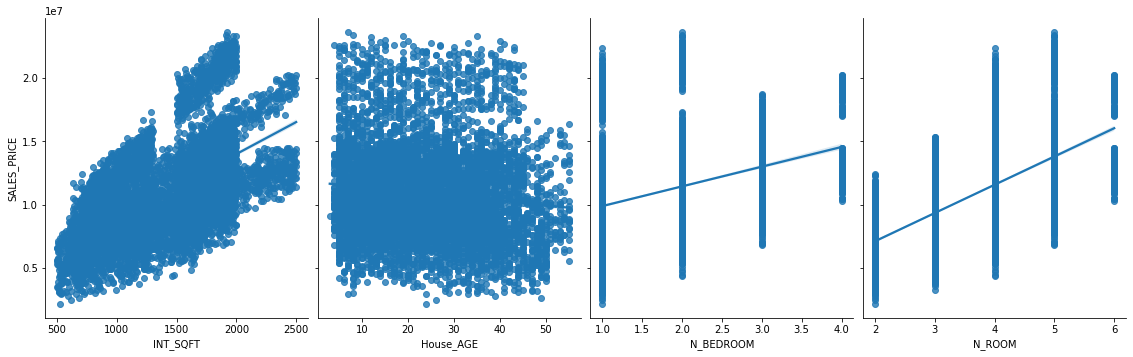

In [ ]:
sns.pairplot(chnsal,x_vars=["INT_SQFT", "House_AGE","N_BEDROOM","N_ROOM"], y_vars=["SALES_PRICE"],
             height=5,aspect=.8, kind="reg")
plt.show()

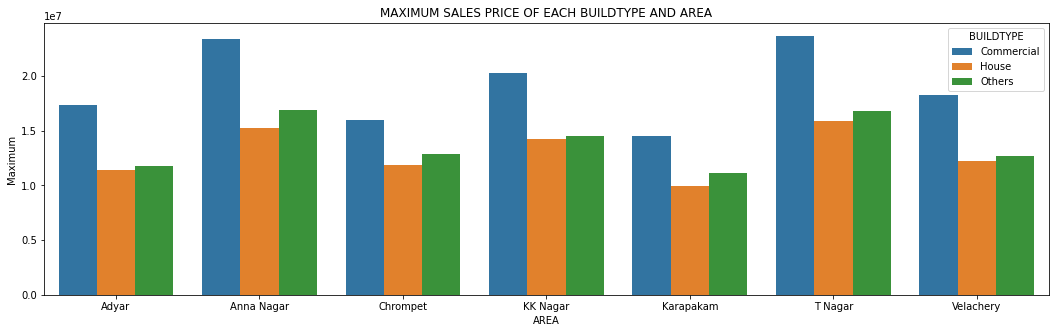

In [ ]:
max=pd.DataFrame(chnsal[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(chnsal[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())
mnx_df = pd.concat([min,max['SALES_PRICE'].rename('Maximum')],axis=1)
column =['Minimum','Maximum']
mnx_df = pd.DataFrame(mnx_df)
#mnx_df.rename(columns={'SALES_PRICE':'Minimum'},inplace=True)
mnx_df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']
mnx_df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Maximum',data=mnx_df,hue='BUILDTYPE')
plt.title('MAXIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()                 

In [15]:
chnsal.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [16]:
#fig=px.bar(chnsal,x='AREA',y='SALES_PRICE')
#fig.update_layout( xaxis={'categoryorder':'total ascending'})
#fig.show()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
#chnsal['AREA']=le.fit_transform(chnsal['AREA']{'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KKNagar':5,'Anna Nagar':6,'T Nagar':7})
chnsal['AREA']=chnsal['AREA'].map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KKNagar':5,'Anna Nagar':6,'T Nagar':7})
chnsal['UTILITY_AVAIL']=chnsal['UTILITY_AVAIL'].map({'ELO':1,'NoSeWa':2,'NoSewr ':3,'AllPub':4})
chnsal['SALE_COND']=chnsal['SALE_COND'].map({'Partial':1,'Family':2,'AbNormal':3,'Normal Sale':4,'AdjLand':5})
chnsal['BUILDTYPE']= le.fit_transform(chnsal['BUILDTYPE'])
chnsal['PARK_FACIL']= le.fit_transform(chnsal['PARK_FACIL'])
chnsal['STREET']= le.fit_transform(chnsal['STREET'])
chnsal['MZZONE']= le.fit_transform(chnsal['MZZONE'])
#onehot - for buiildtype
#chnsal['BUILDTYPE']=pd.get_dummies(chnsal["BUILDTYPE"],drop_first=True).astype(int)
chnsal.head()

,AREA,INT_SQFT,DIST_MAINROAD,House_AGE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,1,1004,131,44,1,1,3,3,1,0,4,2,0,7600000
1,6,1986,26,11,2,1,5,3,0,0,4,0,3,21717770
2,2,909,70,20,1,1,3,3,1,0,1,0,4,13159200
3,4,1855,14,22,3,2,5,2,0,2,3,2,2,9630290
4,1,1226,84,30,1,1,3,3,1,2,4,0,1,7406250


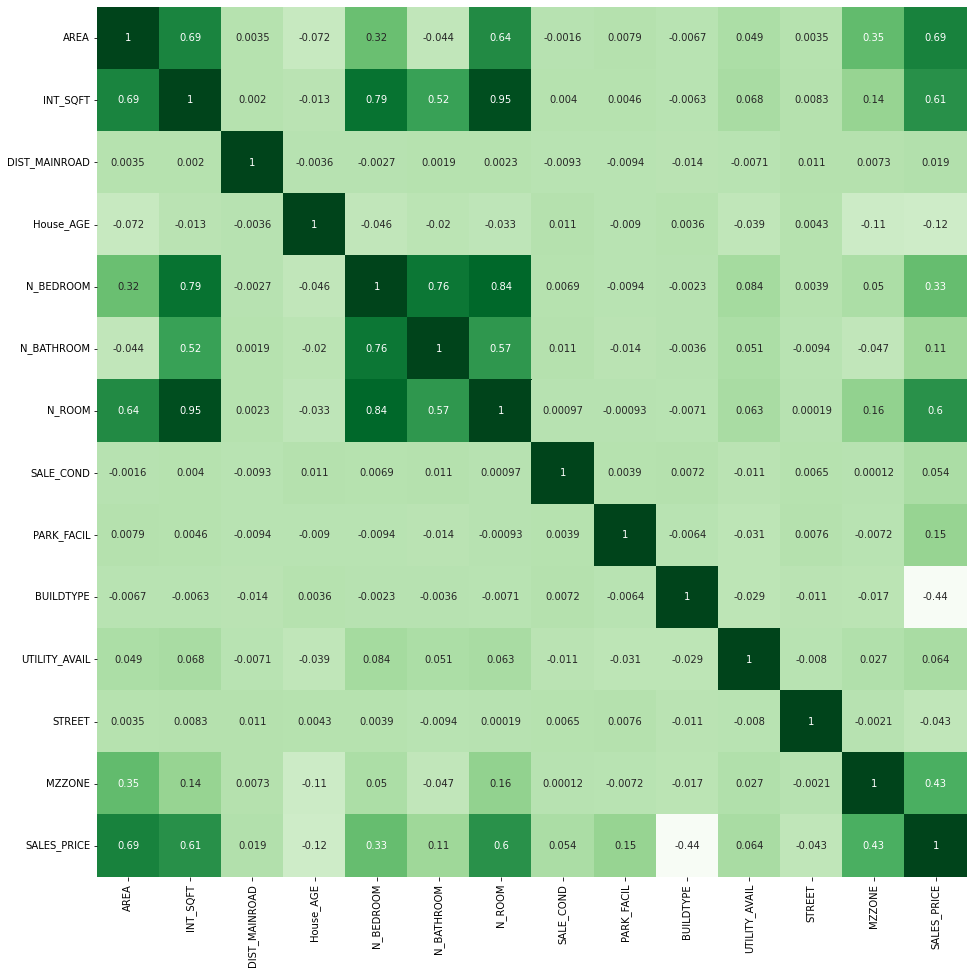

In [18]:
#correlation Matrix -feature importance
plt.figure(figsize=(16,16))
#, fmt='.2%'
sns.heatmap(chnsal.corr(), square= True, cbar=False, annot=True, cmap='Greens');

#Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import feature_selection

X=chnsal.drop(columns=["SALES_PRICE"])
y=chnsal["SALES_PRICE"]
print(X.shape)
print(y.shape)

(7109, 13)
(7109,)


In [20]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=3)
model=LinearRegression()
model.fit(Xtrain,ytrain)

scor=model.score(Xtest,ytest)
#print("score:",scor)
print("Accuracy:",scor*100,"%")#Accuracy

Accuracy: 80.3863851988038 %


#Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score

rf = RandomForestRegressor(n_estimators= 200, max_depth = 4, max_features='sqrt')
rf.fit(Xtrain, ytrain)

rf_pred = rf.predict(Xtest)
print(r2_score(ytest, rf_pred))

0.8479979586258966


#Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(Xtrain, ytrain)

d_score = dtree.score(Xtest,ytest)*100
print(d_score)

96.68478570674172


#XGBOOST

In [23]:
import xgboost as xg

xgml= xg.XGBRegressor(colsample_bytree=0.4,gamma=2,learning_rate=0.01,max_depth=4,n_estimators=10000 )
xgml.fit(Xtrain, ytrain)

xg_pred = xgml.predict(Xtest)
print(r2_score(ytest, xg_pred))

[08:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9991192883352701


In [24]:
feature_scores = pd.Series(rf.feature_importances_, index=Xtrain.columns).sort_values(ascending=False)
feature_scores

BUILDTYPE        0.272288
AREA             0.245604
INT_SQFT         0.187244
N_ROOM           0.144535
MZZONE           0.080348
N_BEDROOM        0.044548
N_BATHROOM       0.008009
House_AGE        0.006863
PARK_FACIL       0.006411
STREET           0.002187
SALE_COND        0.001054
DIST_MAINROAD    0.000494
UTILITY_AVAIL    0.000415
dtype: float64

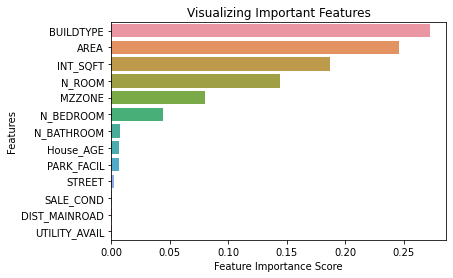

In [25]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')

plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()